# REFERENCE 

[1] https://deepgram.com/learn/best-python-audio-manipulation-tools

[2] https://www.geeksforgeeks.org/how-to-concatenate-audio-files-in-python/

[3] https://stackoverflow.com/questions/51826044/transition-between-audiosegment-object-and-a-wave-file-data

[4] https://www.geeksforgeeks.org/how-to-concatenate-audio-files-in-python/

[5] https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8

[6] https://www.descript.com/blog/article/crossfade-audio-what-crossfade-is-and-how-to-edit-it

[7] https://www.sweetwater.com/insync/crossfade/

[8] https://docs.python.org/3/faq/programming.html#why-am-i-getting-an-unboundlocalerror-when-the-variable-has-a-value

[9] https://www.tutorialspoint.com/How-to-find-the-nth-occurrence-of-substring-in-a-string-in-Python



# use 10 percent of Theunissen Data RANDOMLY

## Adult or Juvenile

in this part we make decision on which folder is appropreate to use, Adult data or juvenile one.

In [1]:
init_address = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen"

""" prompt = " Juvenile = 1 , Adult = 0"
ad_or_juven = input(prompt) """

ad_or_juven = 0 


def adult_or_juvenile(input):
    if input == 0 : 
        address = init_address + "/AdultVocalizations"
    elif input == 1 :
        address = init_address + "/ChickVocalizations"
    else :
        print("wrong input entered")
    return address 

    

## randomly select m files and move them into the new directory

I want to write a function to modulate this application, assume we have N files in specific directory, we want to make a new folder in the same directory and randomly select M files out of N (N > M) and copy the selected files into the new folder. in this function we do this.

First of all, we specify the number of M and N. N is a fixed value based on the base directory, and M is 10 percent of the 

**before this there are multiple things to do:
1. change the code in a way that can read all the audio file's formats.
1. make downloading the dataset automatic**


## what is wav files and why do we use it? [1]

There’s one well known way to represent sound - using waves. However, computers can represent that data in many ways. The most common audio data file types are .wav and .mp3. The main difference between .wav and .mp3 files is that .wav files are not compressed and .mp3 files are. This makes .wav files great for when you need the highest quality audio and .mp3 files best when you need fast streaming.

In [2]:
import os 
import random 
import shutil 
import wave


address = adult_or_juvenile(ad_or_juven) 
source_address = address

# N is the number of the files in the directory 
N = len(os.listdir(address))
# M is equal to the 10 percent of the total files
M = int(N * 0.1)

def copy_m_random_wav_files(source, m):
    
    # Get a list of all WAV files in the source directory
    wav_files = [file for file in os.listdir(source) if file.endswith(".wav")]
    
    # Randomly select m files
    selected_files = random.sample(wav_files, m)
    
        
    # Create output directory
    destination = source + "/randomly_selected_files" 
    if not os.path.exists(destination):
        os.makedirs(destination, mode=0o777)
        
    for file in selected_files: 
        source_path = os.path.join(source, file)
        destination_path = os.path.join(destination, file)
        # to avoid adding to the directory multiple times
        if len(os.listdir(destination)) < M  :
            shutil.copyfile(source_path, destination_path)
        
    print(f"Successfully copied {m} random WAV files to {destination}")
    return destination , selected_files 


destination, selected_files  = copy_m_random_wav_files(source_address, M)

destination

Successfully copied 297 random WAV files to C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/AdultVocalizations/randomly_selected_files


'C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/AdultVocalizations/randomly_selected_files'

## Preprocessing

before entering the algorithem, we need to check whether there is any dirturbed file or any file with wrong name format or not. so we check that by listing the name of the audio files in the main directory and we check if after the first "-" sign, one of the vocalization types is included. 
here is a example of some of the distribance of the output file.

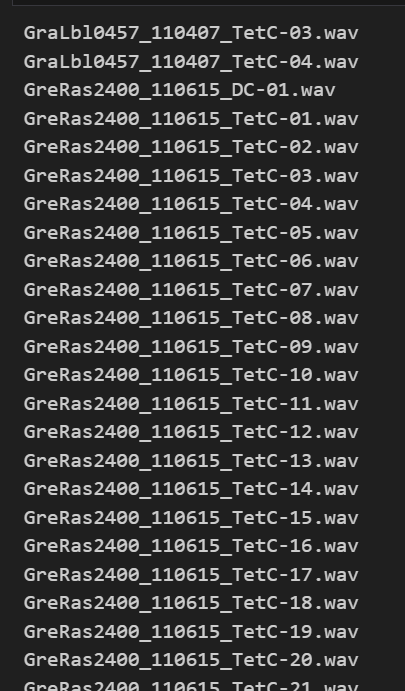

40 files have problems. 
37 of them had the problem that is mentioned in the above image. 
and 3 of them had following problem:

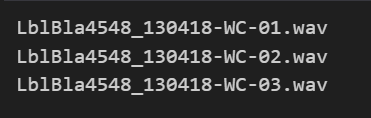

WC is not defined label. I listen to them it was whine calls and changed them manually because they we few.

In [3]:
# the function below finds takes a string and a substring as an input 
# and the nth time of something that you are looking for and it gives 
# you the index of it.
# I found it on the internet[9]
## BE CAREFUL n STARTS AT ZERO

def findnth(string, substring, n):
   parts = string.split(substring, n + 1)
   if len(parts) <= n + 1:
      return -1
   return len(string) - len(parts[-1]) - len(substring)


In [5]:
import os 

call_types = {"Ag" : "Aggressive Calls", "Be" : "Begging Calls",
              "DC" : "Distance Calls", "Di" : "Distress Calls",
              "LT" : "Long Tonal Call", "Ne" : "Nest Calls",
              "So" : "Song", "Te" : "Tet Calls",
              "Th" : "Thuck Calls", "Tu" : "Tuck Calls", "Wh" : "Whine Calls"}

files = os.listdir(address)
counter = 0 
try: 
    for file in files: 
        if file.endswith("wav"):
            hyphen_index = file.index('-')
            VT = str(f"{file[hyphen_index + 1]}") + str(f"{file[hyphen_index + 2]}")
            if VT not in call_types:
                counter += 1 
                if file.count("_") > 1 :
                    old = address + str(f"/{file}") 
                    index_of_Second_underline = findnth(file, "_", 1)
                    file = file[:index_of_Second_underline -1]  +  "-" + file[index_of_Second_underline +1 : ] 
                    new = address + str(f"/{file}")
                    os.rename(old, new)
                    
                else : 
                    print(file)
                    
                    
except :
    print("following file needs some manually changes") 
    print(file)

counter 

0

## add different wav files to each other in python(Concatinate Audio Files)
[2][3][4]

In the following part, we used "merge_m_wave_files" function to merge m different wave files to eachother, to implement this idea we first read each audio file then we add it to a predifined audio file which is initially empty, using append function. 
append has a few parameters one of them is **crossfade** 

- what is crossfade? 
  
Crossfading is an audio editing technique that creates a smooth transition between two audio clips. When you crossfade audio, you make one audio clip fade out as the next clip simultaneously fades in.[6] so in here we set the value zero. 


## Add noise to the accumulated Audio file

We describe 2 types of noises that can be added to audio data

* Additive White Gaussian Noise (AWGN)
* Real world noises
[5]



# *********************************************

I have wrote this structure in three different ways and this is the last and most efficient one. 

In [6]:
import numpy as np 
from pydub import AudioSegment
from pydub.playback import play 
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import os
import silence

c:\Users\t_mor\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## parameters

I tried to write this programe as modular as possible, hence I did not define anything database-dependent so far. Now I want to bring the dataset. 
if __name__ == "main"

## play the accumulated Audio file
make sure to install pyaudio before running this line of code, 
to install it on pip you can run this command
**!pip install pyaudio**

In [5]:
try : 
    play(merged_audio)
except KeyboardInterrupt : 
    print("you have interrupted playing Audio file")
except:
    print("sth else went wrong") 

sth else went wrong


# =======================================
# =======================================
# =======================================

simple implementation

In [27]:
file_names = os.listdir(destination)
file_path = destination + str('/log.txt')
# define an empty audio file [3]
accumulated_audio = AudioSegment.empty()

# parameters to know whether we want to add noise or silence
# you can take it from user **
add_silence = 0
add_white_noise = 0 
add_env_noise = 1

# add the detail about size and length of audio file
starts_from = 0
audio_duration = 0 
Ends_at = 0 

# it has to be taken from output
snr_dB = 50 # The desired SNR level in dB

noise_add = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/noise/OOFFICE/ch02.wav"
destination = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/AdultVocalizations/randomly_selected_files"

I used z-score to nomalized values, we need to normalize them otherwise we face error because of the large values we have.
we take the input, no matter what data structure it has, we turn it into a numpy array to ease calculations. 

In [30]:
from pydub import AudioSegment
import numpy as np
import math 

def z_normalization(input):
        input = np.array(input)
        input_mean = np.mean(input)
        input_std = np.std(input)
        input = abs((input - input_mean)) / (input_std)
        return input



def get_noise(signal, noise , snr_dB):
        signal_power = math.sqrt(np.sum( signal ** 2 ))
        noise_power = math.sqrt(np.sum(noise ** 2))
        factor = (signal_power / noise_power) * (10 ** (-(snr_dB / 20)))
        adjusted_noise = noise * factor * len(noise)
        return adjusted_noise


In [31]:
try:   
    with open(file_path, 'w') as text_file:
    
        text_file.write("File Name" + " | " +  "Call Type" + " | " + "starts from" + " | " + "Ends at" + "\n" +"\n"  ) 
        for file in file_names:
            if file.endswith("wav") and "-" in file:
                    
                ## start audio concatination 
                wav_path = destination + str(f"/{file}")
                audio = AudioSegment.from_wav(wav_path)
                accumulated_audio = accumulated_audio.append(audio , crossfade=0)
                duration = audio.duration_seconds 
                Ends_at = starts_from + duration
                # end audio concatination 

                # start writing about the audio file concatinated
                hyphen_index = file.index('-')
                VT = str(f"{file[hyphen_index + 1]}") + str(f"{file[hyphen_index + 2]}")
                text_file.write( file + " | " + call_types[VT] + " | " + str(starts_from)  + " | " + str(Ends_at) +"\n" ) 
                # end writing about the audio file concatinated
                
                
                # start adding silence to accumulated_audio
                if add_silence == 1 : 
                    starts_from = Ends_at
                    # in qesmat ro inja ezafe mikonam vali byd be on for e ezafe koni
                    silence_segment = AudioSegment.silent(2000)
                    accumulated_audio = accumulated_audio.append(silence_segment, crossfade=0)
                    Ends_at = starts_from + duration 
                    text_file.write( "Silence" + " | " + str(starts_from)  + " | " + str(Ends_at) +"\n" )
                    starts_from = Ends_at
                    
                else: 
                    #print("neither noise nor  silence added to the main file")
                    starts_from = Ends_at
                # end adding silence to accumulated_audio
                
        # export the version that is accumulated data and silence
        dest_path = destination  + "/accumulated_audio.wav"
        accumulated_audio.export(dest_path, format='wav' )
        
        
        # add noise 
        if add_white_noise == 1: 
             pass
        
        elif add_env_noise == 1: 
             # Load the audio files
            audio_signal = accumulated_audio
            noise = AudioSegment.from_wav(noise_add)

            # Convert the audio to numpy arrays
            signal_array = np.array(audio_signal.get_array_of_samples())
            noise_array = np.array(noise.get_array_of_samples())
            
            signal_array = z_normalization(signal_array)
            noise_array = z_normalization(noise_array)


            
            if(len(noise_array)>len(signal_array)):
                noise_array=noise_array[0:len(audio_signal)]
            
            if (len(noise_array) < len(signal_array)):
                number_of_repetition = int(len(signal_array) // len(noise_array))
                noise_array = np.tile(noise_array, number_of_repetition)
                noise_array = np.resize(noise_array, len(signal_array))

            #signal_array = signal_array.astype(np.float32)
            #noise_array = noise_array.astype(np.float32)

            
            
            noise=get_noise(signal_array,noise_array,snr_dB)
            noisy_signal_array = signal_array + noise 
            
            
            # Create a new AudioSegment object with the result
            noisy_signal = AudioSegment(
            data=noisy_signal_array.tobytes(),
            sample_width=audio_signal.sample_width,
            frame_rate=audio_signal.frame_rate,
            channels=audio_signal.channels
            )

            # Export the result as a new WAV file
            noise_path = destination + "/env_noise_audio.wav"
            noisy_signal.export(noise_path, format="wav")
            text_file.write( "Enviroment Noise" + " | " + "SNR(dB)"  + " | " +  f"{snr_dB}" +"\n" ) 
            

            
            
                

except KeyError:
    print("you got problem")          